* * *
<pre> NYU Paris            <i> Artificial intelligence - Fall 2022 </i></pre>
* * *


<h1 align="center"> Lab 8: Unsupervised learning (II): K-means clustering </h1>

<pre align="left"> October 20th 2022               <i> Author: Hicham Janati </i></pre>
* * *


##### Goals:
- More practice with numpy and matplotlib
- Understand the pros and cons of K-means clustering

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

seed = 42

# Part 1: Implementing K-means

In the past labs, we have mainly seen:
- dimension reduction (with PCA)
- classification (i.e supervised learning)

In practice however, the vast majority of data does not have labels. Finding structure and patterns in data without labels is called unsupervised learning. Given a specified number of clusters K, the K-means algorithm forms a partition of your data with K different groups while trying to:
- minimize the variance within groups (i.e samples forming a group must be close to each other)
- maximize the variance between groups (i.e groups must be far from each other).

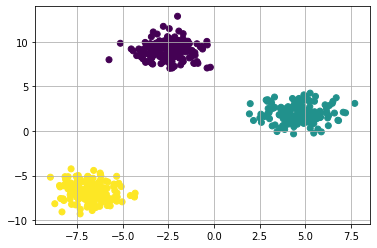

In [87]:
from sklearn.datasets import make_blobs

X, y = make_blobs(500, centers=3, n_features=2, cluster_std=1., random_state=seed)

plt.figure()
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()


It is called K-means because it only consists of two steps. Starting from an initialization of K mean values $M_k$:
- For each sample $x$ of your data, find the mean (centroid) $C_k$ that is closest to x. Assign $x$ to group $k$.
- Update the mean $C_k$ of each group k

### Question 1
Write a function that generates K random initializations for the group centroids $C_k$. 

In [119]:
def init_centroids(K, dimension=2):

    return centroids

### Question 2
Write a function that takes the data X (n, d) and returns an array (n,) containing the id of the cluster it should be assigned to. For example, the function returns [0, 0, 2, 1, 2] if the first two samples are assigned to cluster 0, the 3rd and 5th samples to cluster 2 and the 4th sample to cluster 1. 

_Hint: look up `sklearn.metrics.pairwise_distances` and the numpy method of an array `array.argmin`_

In [120]:
def assign_labels(X, centroids):

    return labels

### Question 3
The following cell visualizes the centroids and their assigned samples. Initialize the centroids and compute a first set of labels of your data and visualize them. Can you think of a smarter way to initialize these centroids using the data ? (No need to implement it for now).

In [1]:
def plot_kmeans(X, labels, centroids):
    K = len(centroids)
    colors = np.array(cm.Set1(np.linspace(0., 1, K)))
    plt.figure()
    plt.grid()
    plt.scatter(X[:, 0], X[:, 1], color=colors[labels], s=4, alpha=0.3)
    plt.scatter(centroids[:, 0], centroids[:, 1], color=colors, marker="^", s=100)
    plt.show()


### Question 4
Write a function that computes the new centroids using the assigned labels. Visualize the new centroids. Repeat these steps (label assignment + centroid update) for 2-3 steps. Does it converge ?

In [122]:
def update_centroids(X, labels, centroids):

    return centroids

### Question 5
The K-means algorithm repeats these operations until the centroids stop changing. Write a function summing up all these operations.

In [123]:
def Kmeans(X, K=3, maxiter=100, plot_steps=False):
    dimension = X.shape[1]
    ## initialization to do
    for ii in range(maxiter):
        ## Kmeans 2 steps to do

        if plot_steps:
            plot_kmeans(X, labels, centroids)

        if  ## Stopping condition todo:
            break

    return labels, centroids


### Question 6

Generate different sets of data examples (changing the `cluster_std` parameter) and visualize the K-means output. What do you notice ? 

2


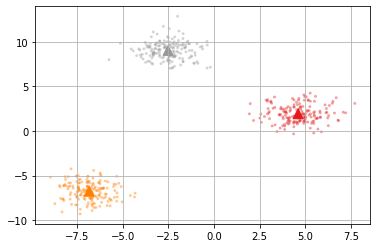

### Question 7
Try Kmeans with this new data. Choose K wisely. Is it normal that Kmeans fails ?

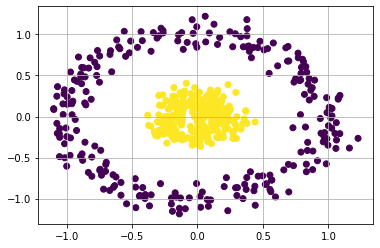

2


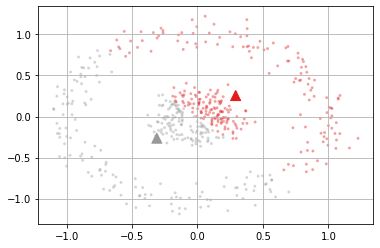

In [125]:
from sklearn.datasets import make_circles

X, y = make_circles(500, noise=0.1, factor=0.2)


# Part 2: Compressing images with K-means
Is it often the case that data is redundant. Take the example of the image below:

Image original shape:  (427, 640, 3)
Flower colors shape:  (273280, 3)


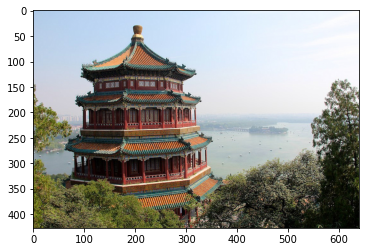

In [144]:
from sklearn.datasets import load_sample_image

flower = load_sample_image('china.jpg') / 255
flower_shape = flower.shape
flower_colors = flower.reshape(-1, 3)

print("Image original shape: ", flower_shape)
print("Flower colors shape: ", flower_colors.shape)

max_color = flower.max()

plt.figure()
plt.imshow(flower)
plt.show()

### Question 8
We would like to replace all colors by replacing them with the centroid they're closest to. Let's for example reduce them to 16. Run the Kmeans algorithm with K=16 on the downsampled colors array X. Then create a new image with the replaced colors and visualize it.

In [152]:
from sklearn.utils import shuffle
X = shuffle(flower_colors, random_state=0, n_samples=1_000)


### Question 9
Play around with the value of n_clusters (K). What do you notice ?

### Question 10
Try this out but using the sklearn implementation of Kmeans. Do you obtain similar results ? Can you explain the difference ?